In [121]:
import random
import time
from collections import deque

In [122]:
def is_sorted(l):
    for i in range(len(l) - 1):
        if l[i] > l[i + 1]:
            return False
    return True

# String Data Type

Strings in Java are pretty similar to strings in Python. String characters are also stored in an internal array, support supports constant-time access to individual characters.

<strong>Radix:</strong> the number of digits R in an alphabet

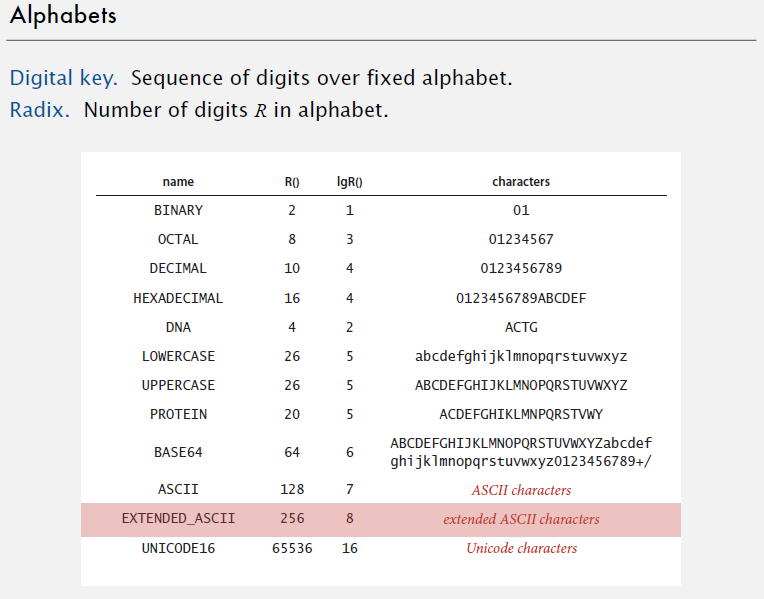

# String Sorting Algorithms

Recall that a general sorting algorithm based on compares cannot be faster than N log N.

So why study more sorting algorithms for strings? Because we can do better than N log N <strong>if you don't use compares</strong>, which we don't need to do for strings!

## Key-Indexed Counting

When keys are small integers, you can use the keys as an array index to create an efficient sort.

The idea is that since the values correspond to a relatively small number of keys, you can use the keys to sort instead of the values themselves. As an example, consider sorting a list of strings by the first letter of the string: You don't need to look at each character, only the first. And since there are only 26 letters, you can sort based on 26 keys rather than the total number of unique strings.

<strong>KEY POINT--you need to know how many keys you're working with in advance!</strong>

Key-indexed counting algorithm:
1. Count the frequencies of each object using the key as the index
2. Compute the frequency cumulates--these specify destinations in the sorted output array
3. Access cumulates using keys as the index to move items into sorted order
4. Copy back into original array (or return new sorted array)

Running time analysis: ~11N + 4R, with N + R extra space.
* But since R << N, in practical applications, the running time is proportional to N--ie, a linear time sorting algorithm (that also happens to be stable, since the objects are sorted in the order in which they appear in the original list)

In [31]:
def key_indexed_count(items):
    # Map objects to keys--here use array indexing for simplicity
    mapper = ['a','b','c','d','e','f']
    R = len(mapper)
    N = len(items)
    # This is the count array
    count = [0 for i in range(R + 1)]
    sorted_items = ['' for i in range(N)]
    
    for i in range(N):
        count[mapper.index(items[i]) + 1] += 1
        
    for r in range(R):
        count[r + 1] += count[r]
        
    for i in range(N):
        sorted_items[count[mapper.index(items[i])]] = items[i]
        count[mapper.index(items[i])] += 1
        
    return sorted_items

In [53]:
l = ['d','a','c','f','f','b','d','b','f','b','e','a']
l = key_indexed_count(l)
is_sorted(l)

True

## LSD Radix Sort (LSD String Sort)

Least-significant digit first string sort algorithm

LSD string sort is a straightforward extension of the key-indexed counting method described above:
* Consider characters from right to left
* Stably sort using the dth character as the key (using key-indexed counting)

LSD string sort requires that the strings all be of the same length, but that's a common situation (eg, account numbers). With LSD string sort, the strings will be sorted in W passes through the strings, where W is the length of each string.

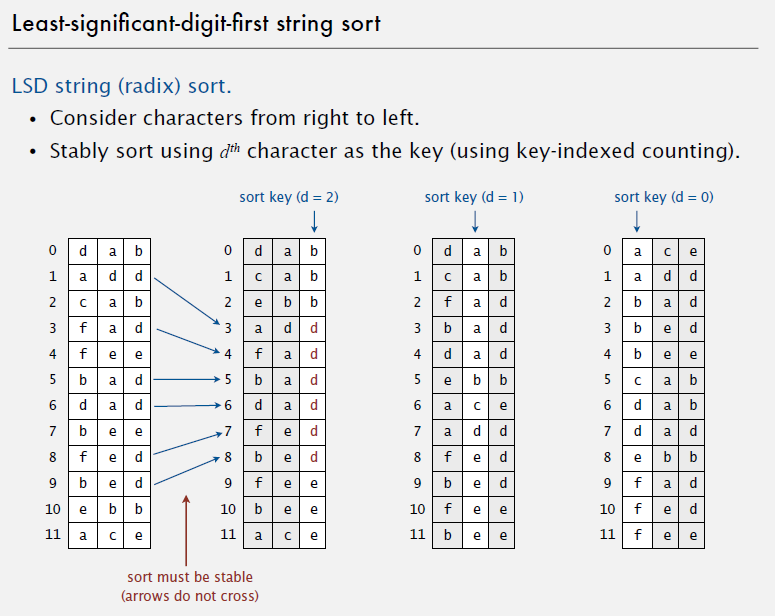

LSD string sort is highly generalisable! In addition to sorting strings, it can be used to sort numbers as well. The idea there is to sort integers by breaking them up into smaller bytes:
* For a list of 32-bit integers, split them into 4 bytes
* Use LSD string sort, with W = 4
This ends up being much faster than other sorting methods, as the LSD string sort algorithm runs in <strong>linear time</strong>

Implementation seems hard, but there's a Java implementation in the booksite.

In [77]:
def lsd_sort(arr, W):
    """
    arr: list of strings
    W: length of each string
    """
    R = 256 # ASCII Extended Radix
    N = len(arr)
    aux = ['' for i in range(N)]
    # Do key-indexed counting from right to left
    d = W - 1
    while d >= 0:
        # The below is just the key-indexed counting algorithm from above
        count = [0 for i in range(R + 1)]
        for i in range(N):
            count[ord(arr[i][d]) + 1] += 1
        for r in range(R):
            count[r + 1] += count[r]
        for i in range(N):
            aux[count[ord(arr[i][d])]] = arr[i]
            count[ord(arr[i][d])] += 1
        for i in range(N):
            arr[i] = aux[i]
            
        d -= 1
        
    return arr

In [117]:
l = ['dab','add','cab','fad','fee','bad','dad','bee','fed','bed','ebb','ace',]
lsd = lsd_sort(l, 3)

In [118]:
l

['ace',
 'add',
 'bad',
 'bed',
 'bee',
 'cab',
 'dab',
 'dad',
 'ebb',
 'fad',
 'fed',
 'fee']

## MSD Radix Sort (MSD String Sort)

MSD (most significant digit first sort), is similar to the quicksort algorithm in that it is a recursive partitioning algorithm.

MSD examines keys from left to right, then creates subarrays of keys starting with the same character, then finally recursively sorts those subarrays.

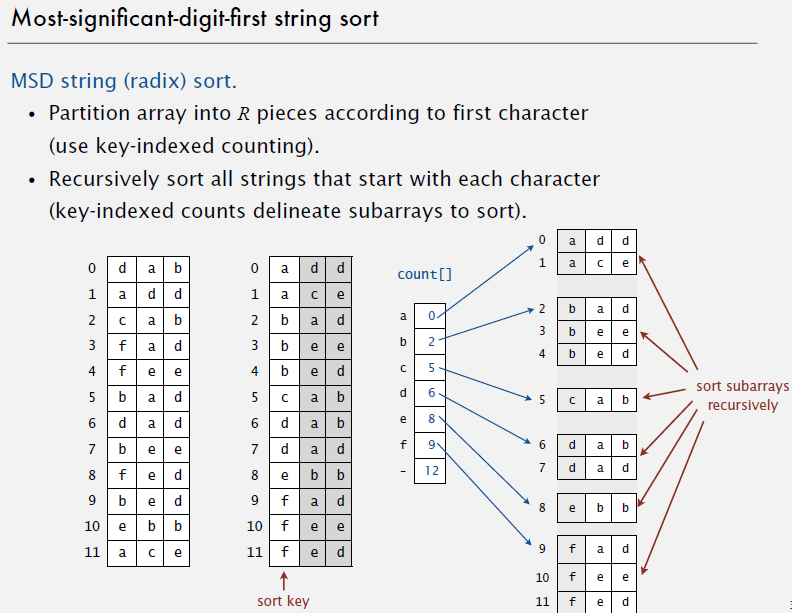

Advantages of MSD string sort:
* Like LSD string sort, performance with random or semi-random keys is sublinear to linear (compared to linearithmic with quicksort)
* Unlike quicksort, MSD sort is stable
* Unlike LSD sort, MSD sort can handle variable length strings

Disadvantages:
* Because it's a recurive algorithm, you end up with a large number of small subarrays that can use up a lot of memory (Can be somewhat mitigated by switching to insertion sort for small subarrays)
* Doesn't efficiently use memory caching

## Longest Repeated Substring

Given a string, find the longest repeated substring.

A brute force solution would need to look at each pair of i and j indices at the start of a possible solution, then compute the longest common prefix for each pair. This would take D * n^2 (quadratic) time though, where D is the length of the longest match.

Instead, you can solve this efficiently using <strong>suffix arrays</strong>:
* A suffix array is an array where each item is a substring of the original string, starting at the index of the suffix array

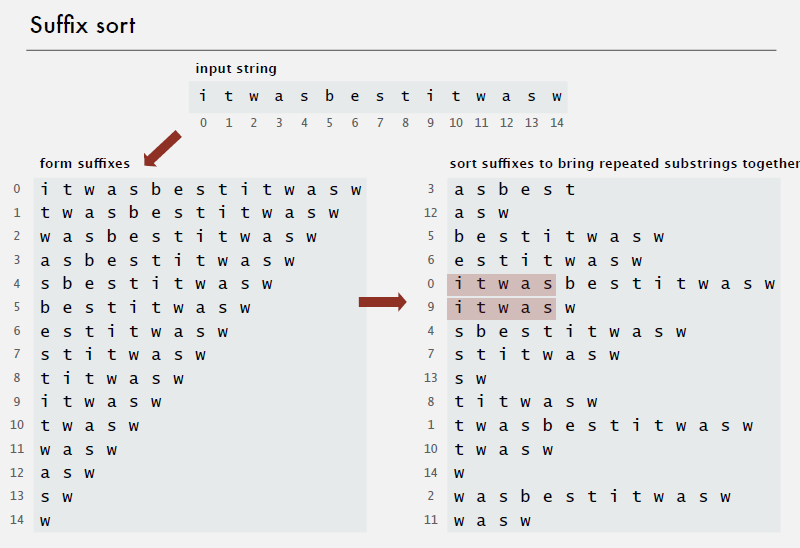

Using this kind of data structure, solving the longest repeated substring problem is acheivable in <strong>linear time</strong>:
1. Form suffix array of input string
2. Sort the suffix array (ideally using an efficient string sorting algorithm)
3. Compute the longest prefix between adjacent suffixes

In [236]:
def lcp(s1, s2):
    """Returns the length of the longest common prefix between two strings"""
    min_length = min(len(s1), len(s2))
    lcp = 0
    for i in range(min_length):
        if s1[i] != s2[i]:
            return lcp
        lcp += 1
    return lcp

def longest_repeated_substring(s):
    """Returns the longest repeated substring in s
    
    1. Compute the suffix array of s
    2. Sort the suffix array
    3. Find the longest common prefix among adjacent entries in the suffix
    array
    """
    suffix_arr = []
    for i in range(len(s)):
        suffix_arr.append(s[i:])
        
    """Using the system sort here for simplicity, but a custom sort could
    also be used and might be much faster depending on the data"""    
    suffix_arr = sorted(suffix_arr)
    
    lrs = ''
    for i in range(len(s) - 1):
        len_lcp = lcp(suffix_arr[i], suffix_arr[i + 1])
        if len_lcp > len(lrs):
            lrs = suffix_arr[i][0:len_lcp]
    return lrs

In [237]:
s = 'aacaagtttacaagc'
longest_repeated_substring(s)

'acaag'

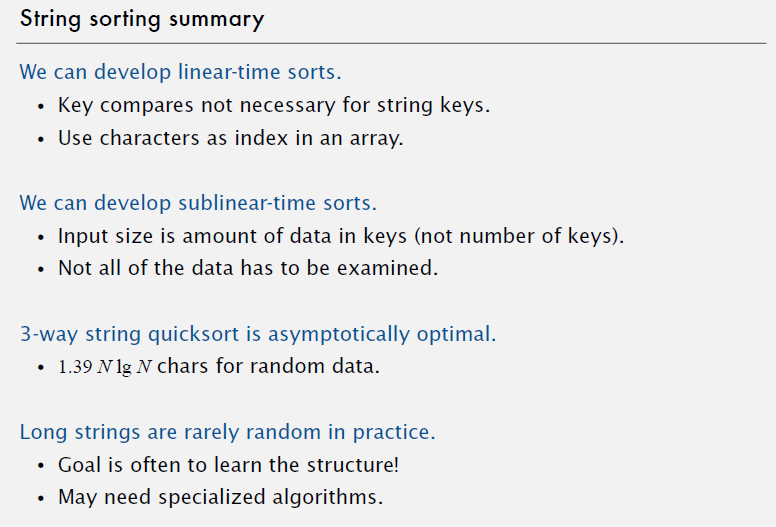

# Tries

## R-way Tries

Tries are a special kind of symbol table where the keys are strings.

When the keys are strings, you can take advantage of special properties of strings (such as being able to sort without looking at the entire string) to enable even faster algorithms than hasing and red-black BSTs.

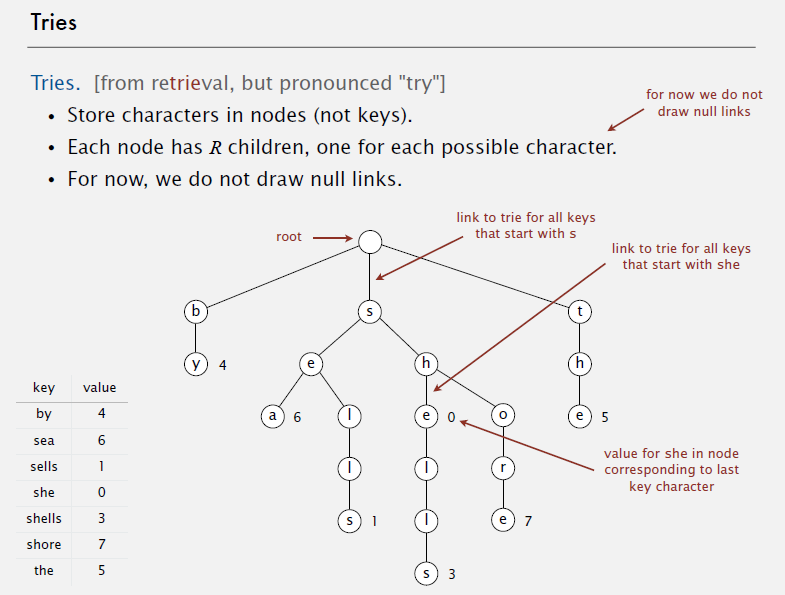

Searching in tries:
* Follow links corresponding to each character in key
* If the search ends in a node with a non-null value, the trie contains the search string
* If a null link is reached or the search ends in a node with a null value, the trie does not contain the string

Inserting in tries:
* Follow links corresponding to each character in key
* If you encounter a null link, create a new node with the character
* When you get to the last character in the key, associate the given value with that node

### Trie Implementation

When implementing tries, the key point is that the keys and characters are NOT EXPLICITLY REPRESENTED.

They keys of nodes in a trie are implicitly defined by their presence as links from a parent node. Each node in a trie initially has null links pointing to each other possible character. This is represented as an array, where the indices are the ordinal values of all possible characters.

The 'value' of the character in a given node is therefore defined by the link to that node in the parent: If a position in the parent link array is not null, then there is a node corresponding to the character at that index emanating from the parent.

Finally, the value of a node is stored in the node itself.

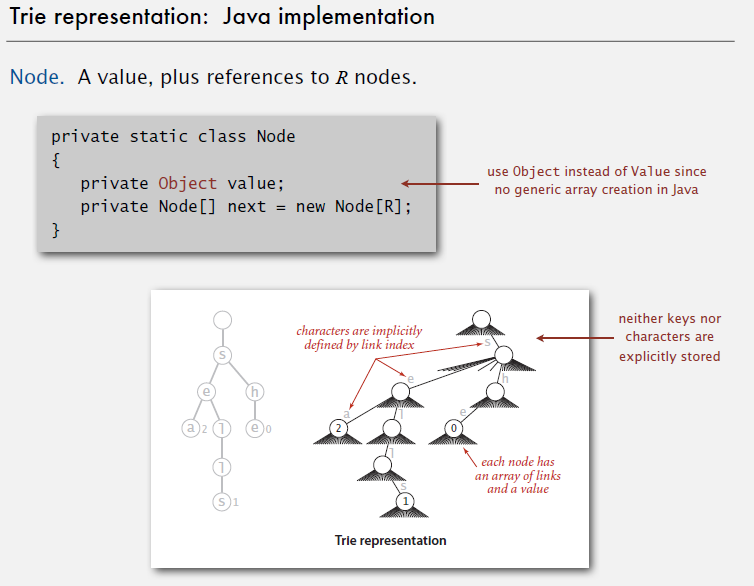

In [161]:
class Node:
    """Node for use in r-way tries
    
    Only constructor argument is R, the radix of the possible keys (256 for
    extended ASCII, 26 for alphabet, etc.)
    """
    def __init__(self, R):
        self.value = None
        self.next = [None for r in range(R)]
        
class Trie:
    """R-way trie implementation
    
    Again, R is the radix of possible keys, which we'll default to 256 here.
    
    Insert, search, and delete operations are all recursive methods!
    """
    def __init__(self, R=256):
        """Initialise trie with a null root"""
        self.R = R
        self.root = Node(R)
        
    def insert(self, key, value):
        if not isinstance(key, str):
            return
        self._insert(self.root, key, value, 0)
    
    def _insert(self, node, key, value, d):
        """Recursive function for insert
        
        d is the current digit you're working with
        """
        if not node:
            node = Node(self.R)
        if d == len(key):
            node.value = value
            return node
        char = key[d]
        node.next[ord(char)] = self._insert(node.next[ord(char)], key, value, d+1)
        return node
    
    def contains(self, key):
        """0 evaluates to False in Python, so need small adjustment"""
        return isinstance(self.get(key), int)
    
    def get(self, key):
        """Returns the value of a key, if it's in the trie"""
        node = self._get(self.root, key, 0)
        if not node or not isinstance(node.value, int):
            return 'Key not found'
        else:
            return node.value
    
    def _get(self, node, key, d):
        """Recursive function for get--returns the NODE, not the value
        
        Again, d is the current digit
        """
        if not node:
            return False
        if d == len(key):
            return node
        char = key[d]
        return self._get(node.next[ord(char)], key, d + 1)
    
    def delete(self, key):
        """Deletes a key, if it exists in the trie"""
        self.root = self._delete(self.root, key, 0)
        return
        
    def _delete(self, node, key, d):
        """Recursive function for delete
        
        1. Find the node corresponding to the key and set its value to null
        2. If the node has null value and all null links, remove the node
        3. Recur
        """
        if not node:
            return False
        if d == len(key):
            node.value = False
        else:
            char = key[d]
            node.next[ord(char)] = self._delete(node.next[ord(char)], key, d+1)
            
        """
        Remove sub-trie rooted a node if it is empty.
        
        The call to self._delete() above returns the below once you've reached
        the end of the call stack.
        
        So, the node being returned below is the CHILD node of the node above!
        
        If the child node has a value or a link, the node.next[ord(char)] = 
        assignment above is just setting the child node equal to itself (ie, 
        preserving it). Otherwise, it's setting the child node reference IN
        THE PARENT NODE equal to False, deleting the child node.
        """
        if node.value:
            return node
        for char in range(self.R):
            if node.next[char]:
                return node
        return False

#### How does a trie store data? See code below

In [343]:
t = Trie()
t.insert('hello', 0)
t.insert('he', 1)
t.insert('helium', 2)
t.insert('hellas', 3)
t.root.next[ord('h')].next[ord('e')].next[ord('l')]

In [345]:
t.delete('hello')

In [346]:
t.get('hello')

'Key not found'

## Ternary Search Tries

A big problem with R-way Tries is the amount of memory they use. Since you have an array of size R at every node, memory costs can quickly increase (eg, using Unicode characters, you'd have an array of size 65,536 at every single node!

Ternary search tries are a way to handle the memory explosion:
* Store characters and values in nodes
* Have <strong>3 children</strong> per node: the trie starting with smaller characters on the left, equal characters in the middle, and larger characters on the right
* This dramatically reduces the number of null links: from R null links in a R-way trie to 3 null links per leaf in a TST

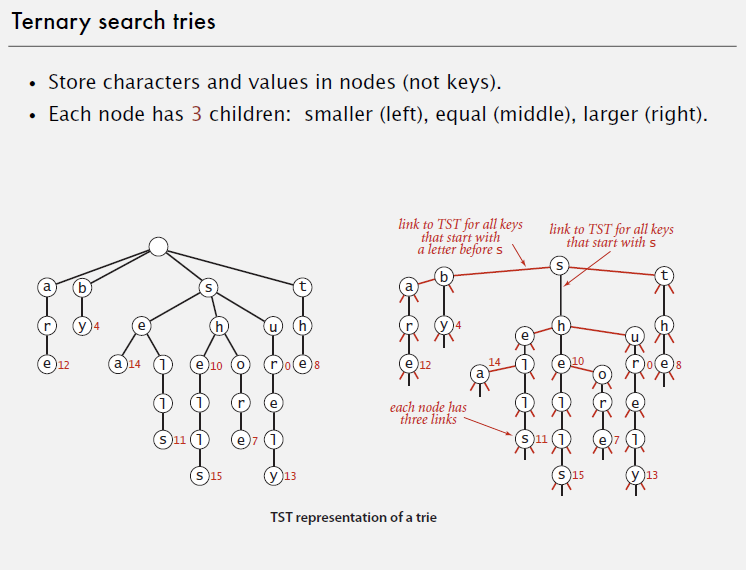

#### Search in a TST:

1. Start at the root
2. Check if the character of the node is equal to the current search character
    * If it's equal, move down the middle link
    * If the search character is less than the node character, move down the left link
    * If the search character is greater than the node character, move down the right link
3. Recur
4. If you reach the end of the search key, check the value of the current node and return it, otherwise return null

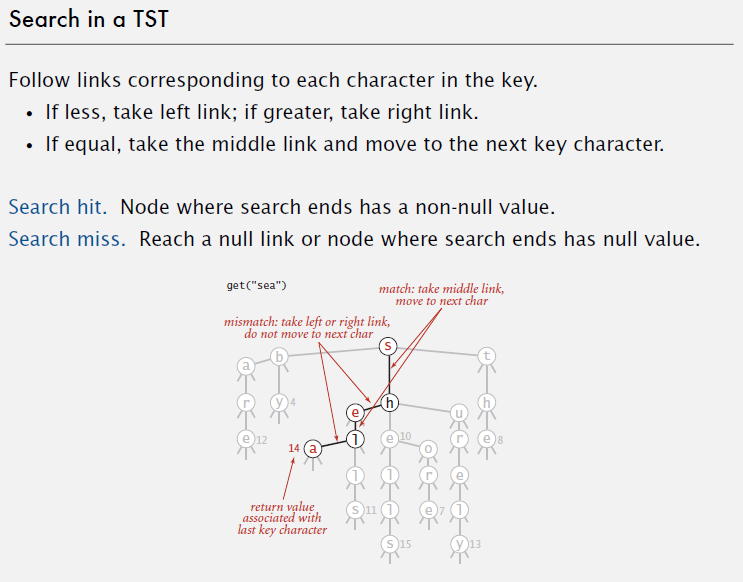

In [92]:
class TSTNode:
    """Class for TST Node"""
    def __init__(self, char, value=None):
        self.char = char
        self.value = value
        self.left = None
        self.middle = None
        self.right = None
        
    def __repr__(self):
        return f'{self.char}: {self.value} ({self.left}, {self.middle}, {self.right})'

class TST:
    """Class for TST"""
    def __init__(self):
        self.root = None
        self.nodes = []
        
    def __repr__(self):
        return '\n'.join(str(node) for node in self.nodes)
        
    def insert(self, key, value):
        """Inserts a key value pair into the TST"""
        self.root = self._insert(self.root, key, value, 0)
        
    def _insert(self, node, key, value, d):
        """Recursive function for insert operation"""
        char = key[d]
        
        if not node:
            node = TSTNode(char)
            self.nodes.append(node)
        
        if char < node.char:
            node.left = self._insert(node.left, key, value, d)
        elif char > node.char:
            node.right = self._insert(node.right, key, value, d)
        # When char == node.char, it will fall through to here
        elif d < len(key) - 1:
            node.middle = self._insert(node.middle, key, value, d + 1)
        elif d == len(key) - 1:
            node.value = value
            
        return node
    
    def get(self, key):
        """Returns the value of key, if it exists in the trie"""
        node = self._get(self.root, key, 0)
        if node:
            return node.value
        else:
            return 'Key not found'
    
    def _get(self, node, key, d):
        """Recursive function for get"""
        if not node:
            return
        
        char = key[d]
        
        if char < node.char:
            return self._get(node.left, key, d)
        elif char > node.char:
            return self._get(node.right, key, d)
        elif d < len(key) - 1:
            return self._get(node.middle, key, d + 1)
        elif d == len(key) - 1:
            return node

In [93]:
t = TST()

In [98]:
t.insert('ace', 0)
t.insert('and', 1)
t.insert('ant', 2)
t.insert('hello', 3)
t.insert('zebra', 4)

In [100]:
t.get('zebra')

4

### Performance of TSTs

Generic implementation of TSTs as above has comparable performance to hashing for string keys while being more space efficient.

Performance can be improved even more to be <strong>better than hashing</strong> by using R-way branching at the root (see below)

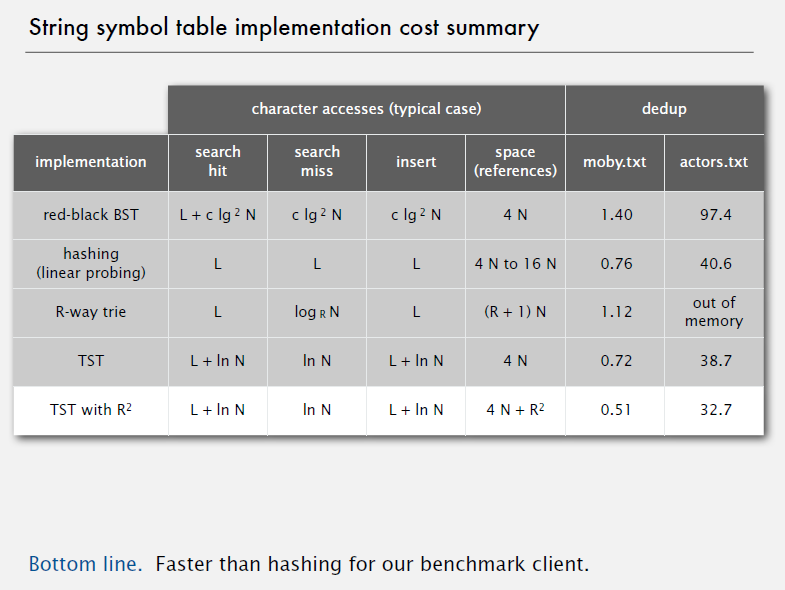

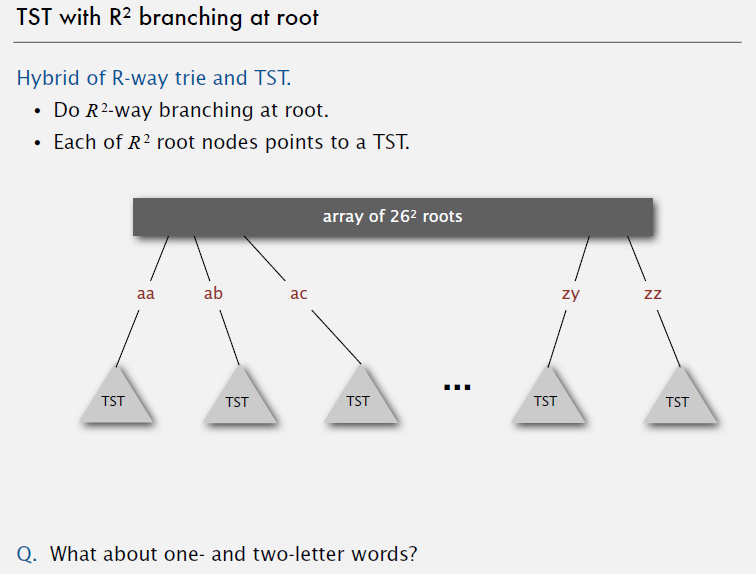

### TSTs vs Hashing

Hashing:
* Need to examine entire key to compute the hash function
* Search hits and misses cost about the same time
* <strong>Performance relies on hash function</strong>
* Doesn't support ordered operations

TSTs:
* Only works for string keys
* Only examines key character that it needs to
* Search miss may involve only a few characters (so you can get sub-linear performance for many practical cases)
* Supports ordered operations

TST bottom line:
* Faster than hashing for string applications
* More flexible than red-black BSTs

## Character-Based Operations with Tries

1. Prefix matching
    * Examples: autocomplete
    * Idea is to get all keys in the trie that start with the prefix
2. Wildcard matching
3. Longest prefix
    * Get longest key in trie that is a prefix of the query string
    * Search for query string
    * Keep track of the longest key encountered during the search

In [197]:
class StringST(Trie):
    """Class for expanded Trie to support more string operations
    
    Note that you could also adapt this code for TSTs as well
    """
    def __init__(self, R=256):
        self.R = R
        super().__init__(R=R)

    def keys(self):
        """Returns keys in the Trie in order"""
        keys = deque()
        self._collect(self.root, '', keys)
        return keys
    
    def keys_with_prefix(self, prefix):
        """Gets all keys that start with prefix
        
        Idea is to find the node where the prefix terminates, then call
        recursive collect method below to get all keys in trie rooted at that
        node
        """
        keys = deque()
        prefix_node = self._get(self.root, prefix, 0)
        self._collect(prefix_node, prefix, keys)
        return keys
    
    def longest_prefix_of(self, query_str):
        """Gets the longest prefix of the query string in the trie"""
        length = self._search(self.root, query_str, 0, 0)
        return query_str[:length]
    
    def _search(self, node, query_str, length, d):
        """Recursive function for longest prefix"""
        if not node:
            return length
        if node.value is not None:
            length = d
        if d == len(query_str):
            return length
        char = query_str[d]
        return self._search(node.next[ord(char)], query_str, length, d + 1)
    
    def _collect(self, node, prefix, keys):
        """Recursive routine for keys
        
        prefix: the sequence of characters on the path from root to node
        """
        
        if not node:
            return
        # In Python, bool(0) -> False
        if node.value is not None:
            keys.appendleft(prefix)
        for char in range(self.R):
            self._collect(node.next[char], prefix + chr(char), keys)

In [205]:
st = StringST()
st.insert('hello', 0)
st.insert('he', 1)
st.insert('helium', 2)
st.insert('hellas', 3)
st.insert('human', 4)

In [199]:
st.keys_with_prefix('hell')

deque(['hello', 'hellas'])

In [206]:
st.longest_prefix_of('humanity')

'human'

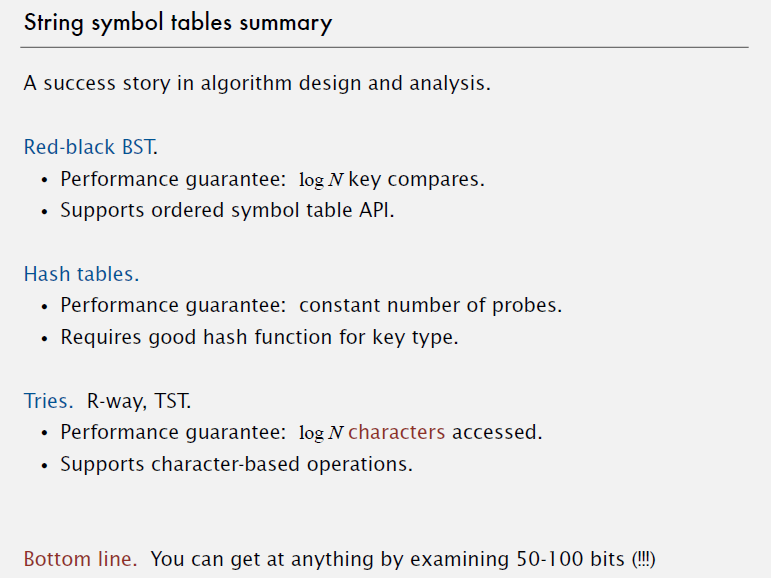

# Substring Search

General problem statement: Find pattern of length M in a text of length N. Typically, N >> M.

## Brute Force Solution: Check every possibility

A brute force solution is to simply check for the pattern at every possible start position.

This algorithm is actually fine in many contexts. But it can be really slow if the text and/or pattern are repetitive (so, the algorithm has to check every character).
* The worst-case performance is proportional to M * N

Brute force algorithm also doesn't work for real-time applications, which are quite important (eg, real-time internet traffic monitoring)

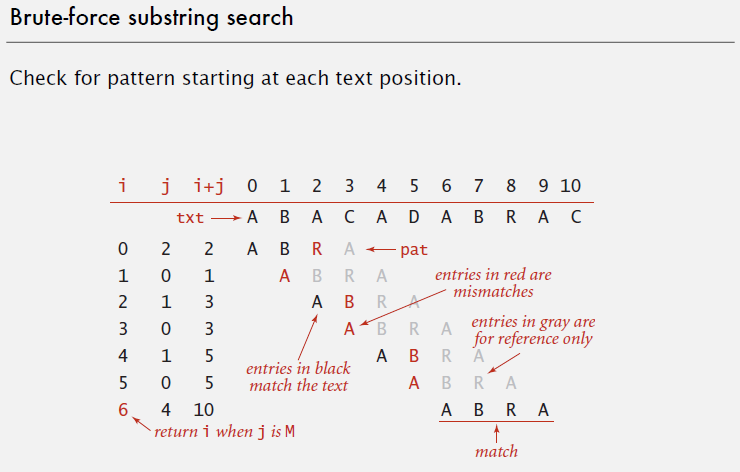

In [215]:
def brute_search(pattern, text):
    M = len(pattern)
    N = len(text)
    for i in range(N - M):
        j = 0
        while j < M:
            if text[i + j] != pattern[j]:
                break
            j += 1
        # Made it through the whole pattern, so you've found a match
        if j == M:
            return (i, text[i:i + M])
    return (N, 'not found')

In [216]:
brute_search('ocean', 'she sells seashells by the seashore')

(35, 'not found')

## Knuth-Morris-Pratt

The key idea behind the Knuth-Morris-Pratt algorithm is that you can use the knowledge of characters seen to efficiently move the pointers such that you don't necessarily need to move forward in the text 1 character at a time

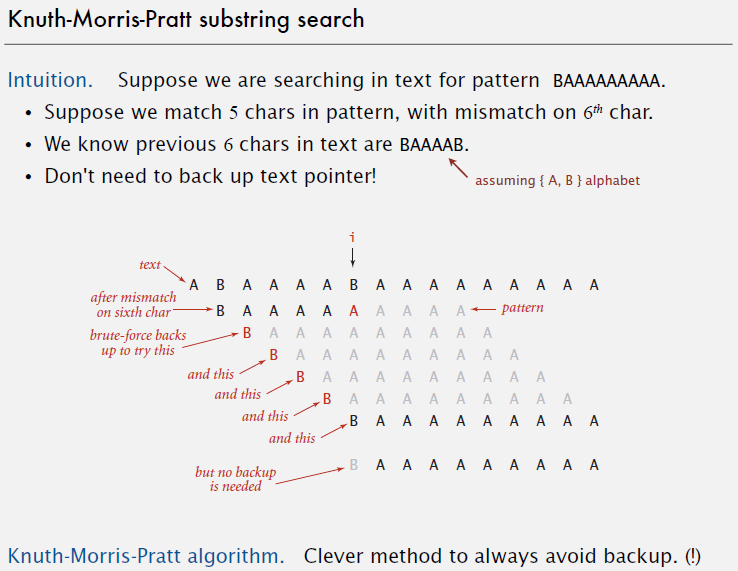

The algorithm works by creating a <strong>deterministic finite state automaton (DFA)</strong> to keep track of mismatches in the text.

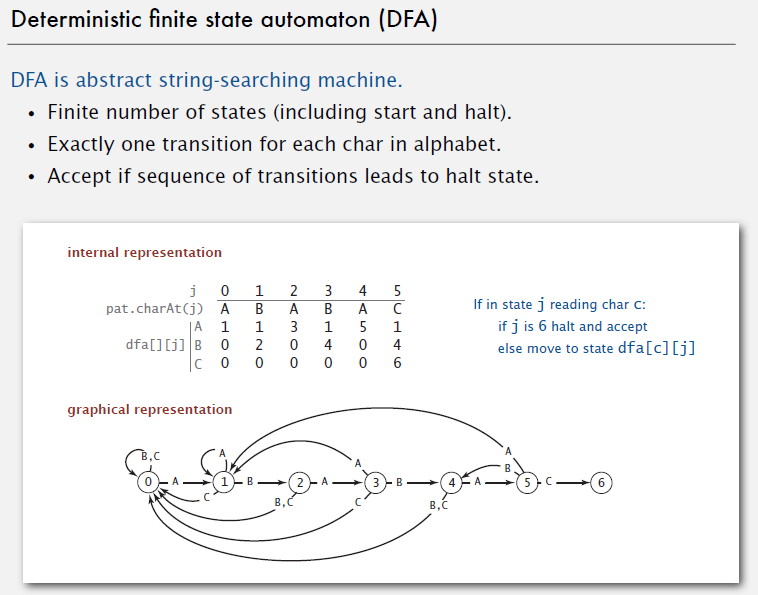

There's a lot going on here, but essentially, the state of the DFA is the number of matched characters in the pattern starting at position i in the text.
* In other words, the state of the DFA is equal to the length of the longest prefix of the pattern that is a suffix of the text from position 0:i

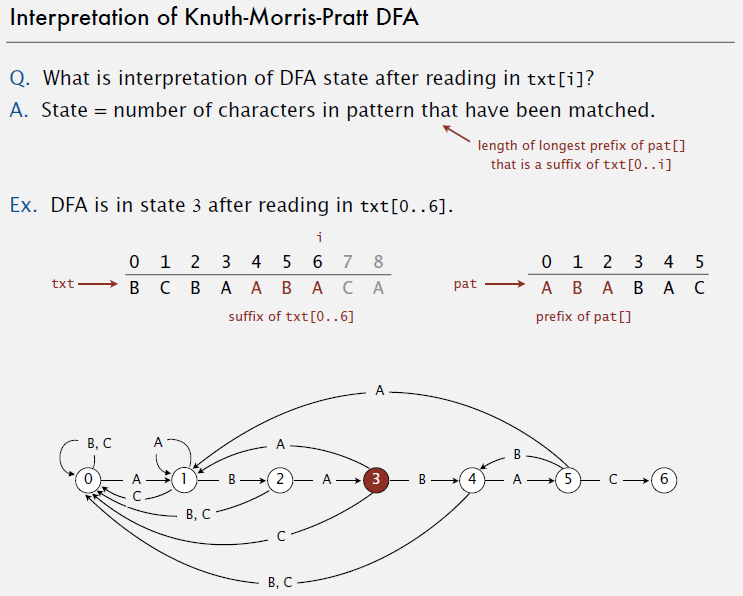

By using a DFA, we can ensure that i never decrements, so the algorithm will require at most N character accesses.
* A key implication of this is that you can replace i with the next character in an input stream--enabling real-time matching in a constant input stream

Building the DFA for a given pattern is tough though

#### How to build a KMP DFA

You need to pre-compute the DFA you're going to use from the pattern of interest.

1. Build match transitions: If in state j and the next character in the text matches the next character in the pattern, go to state j + 1
    * Recall, j is the number of characters in the pattern already matched in the text
2. Build mismatch transition states:
    * If you're in state j and find a mismatch (the next char in the text doesn't match the next char in the pattern), then you know that the last j - 1 characters of the text are the same as the last j - 1 characters in the pattern, with the next char being the mismatched c!
    * Otherwise, you would have hit a mistmatch earlier
    * So, to create the DFA, simulate the DFA for pattern[j - 1] and follow the transition as if you had just hit character c
    
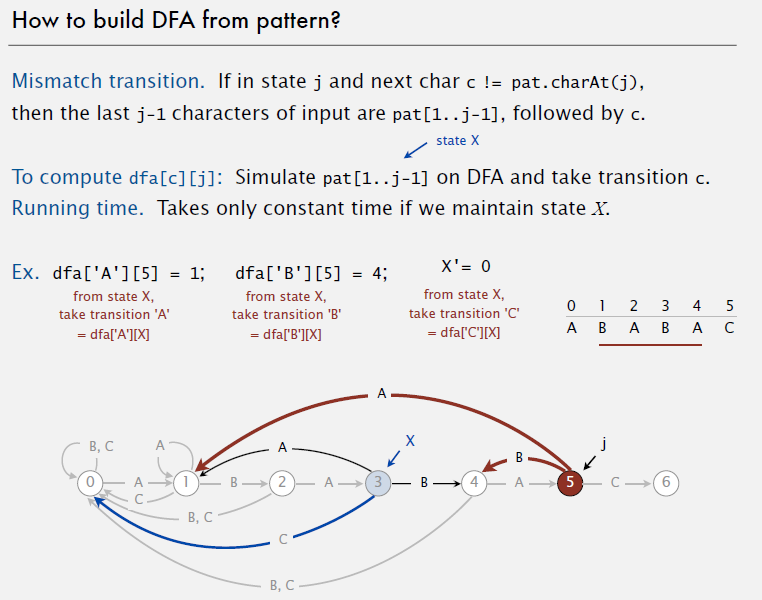

Practically, you can copy dfa[][X] to dfa[][j] for the mismatch case (leaving the match transitions intact). See code below.

In [325]:
def kmp_search(pattern, text):
    """Runs substring search using the Knuth-Morris-Pratt algorithm"""
    N = len(text)
    M = len(pattern)
    i, j = 0, 0
    
    dfa = build_dfa(pattern, 256)
    while i < N and j < M:
        j = dfa[ord(text[i])][j]
        i += 1
    if j == M:
        match_start_pos = i - M
        match_end_pos = i
        return (i - M, text[match_start_pos:match_end_pos])
    else:
        return N, j, M
    
    
def build_dfa(pattern, R):
    """DFA is a 2d array of size Radix x len(pattern)
    
    R is the radix of interest"""
    M = len(pattern)
    # For every position, there are a R possible inputs, so R transitions
    dfa = [[0 for m in range(M)] for _ in range(R)]
    dfa[ord(pattern[0])][0] = 1 # First match transition state
    j = 1 # Set j to 1
    X = 0 # Keep track of simulation
    while j < M:
        for c in range(R):
            dfa[c][j] = dfa[c][X] # Copy mismatch cases from simulation
        dfa[ord(pattern[j])][j] = j + 1 # Set match case--advance j
        X = dfa[ord(pattern[j])][X] # Update the restart state
        j += 1
    return dfa
    

In [327]:
kmp_search(pattern='ababac', text='sdfgggvbraaaaaaaaaaaaaaaaaaababacsdfgdsgg')

(27, 'ababac')

## Boyer-Moore Algorithm

The Boyer-Moore algorithm is another very fast substring search algorithm that is even faster than Knuth-Morris-Pratt for typical inputs!

The idea is to scan characters in the pattern from right to left, and compare that character to the one in the same position in the text. 
* If that character isn't in the pattern, you can skip M characters in the text because you know you won't find the pattern before that!
* So how many characters can you skip?
    * Mismatch, character not in pattern: skip to 1 character beyond that character
    * Mismatch, but character is in pattern: align text with the right-most instance of that matched character
    * Mistmatch, character is in pattern multiple times: increment i by 1 (algorithm no better than brute force, but this won't happen often for long non-repetitive strings)

Running time is proportional to N/M -- <strong>sub-linear time</strong>

Just like for Knuth-Morris-Pratt, there's a bit of pre-computation you need to do to figure out how many characters to skip for a given character (much simpler than DFA though).

To do that, just create an array with the index of the right-most character in the pattern:

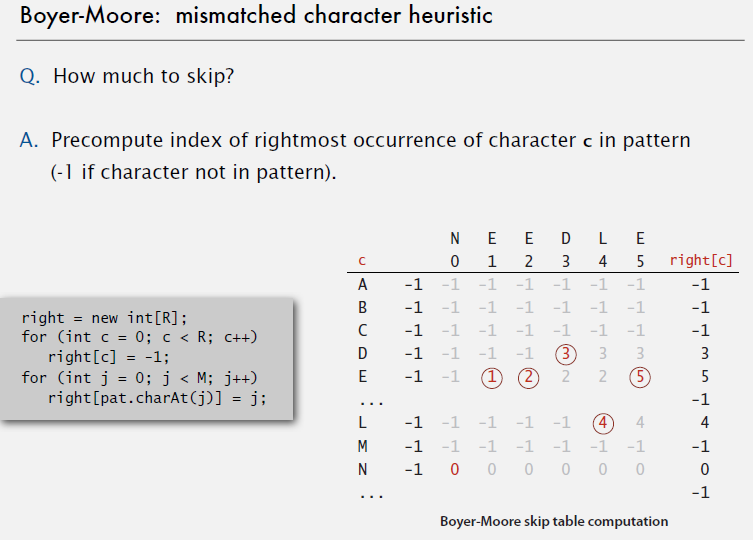

In [334]:
def right_most(pattern, R):
    """Returns array with the right-most index of char c in pattern"""
    right_most = [-1 for r in range(R)]
    for j in range(len(pattern)):
        right_most[ord(pattern[j])] = j
    return right_most

def boyer_moore_search(pattern, text, R=256):
    """Boyer-Moore substring search"""
    N = len(text)
    M = len(pattern)
    right = right_most(pattern, R)
    # Don't need to keep going if less than M chars remain
    for i in range(N - M):
        skip = 0
        # Scan from right to left
        for j in range(M - 1, -1, -1):
            if pattern[j] != text[i + j]: # Mismatch found
                # Computer skip value, typically M
                skip = max(1, j - right[ord(text[i + j])])
                break
        # If skip is 0 at the end of the inner loop, you've found a match
        if skip == 0:
            return i
    return N

In [335]:
boyer_moore_search('needle', 'findaneedleinahaystack')

5

#### Worst-case for Boyer-Moore

In the worst case, where the text and pattern are highly repetitive, Boyer-Moore can take time proportional to M * N (same as brute force). To mitigate that risk, you can add a KMP-like rule (gets worst-case down to ~3N)

## Rabin-Karp Algorithm

Finally, the Rabin-Karp algorithm provides a method to search for patterns using modular hashing:

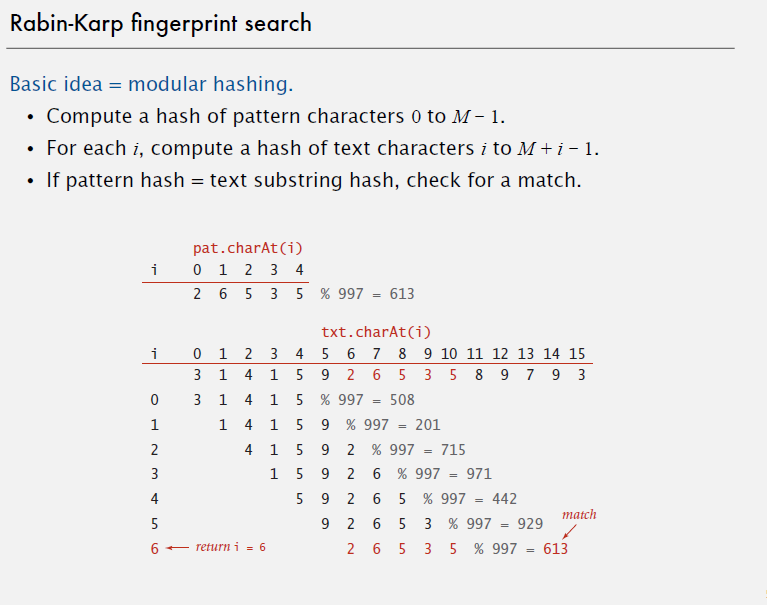

# Substring Search Summary

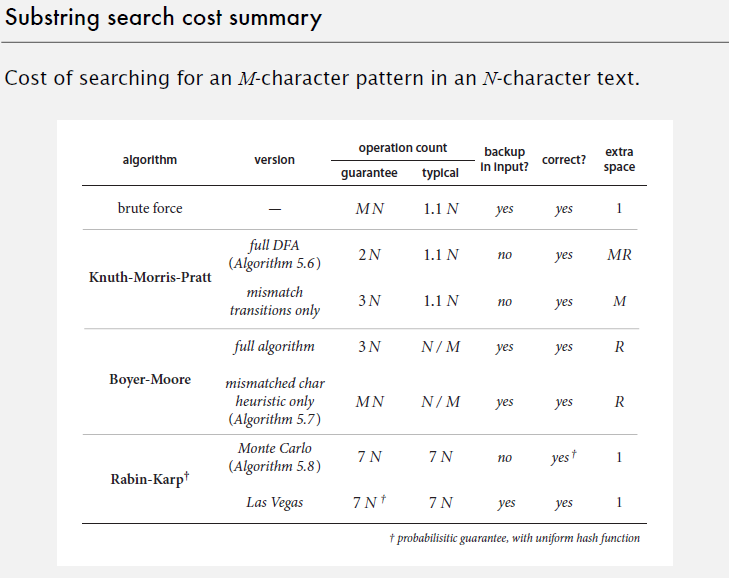